In [ ]:
pip install datasets

In [ ]:
!pip uninstall -y pyarrow
!pip install --no-cache-dir pyarrow

In [ ]:
!pip install --upgrade --no-cache-dir datasets pyarrow pandas numpy

In [11]:
from datasets import load_dataset
 
# Load the dataset
dataset = load_dataset("dair-ai/emotion")
 
# View sample
print(dataset["train"][2])

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}


In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
pip install torch torchvision transformers datasets matplotlib seaborn scikit-learn keras pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [7]:
import tensorflow as tf
print(tf.__version__)  # Should print the version of TensorFlow installed

2.19.0


In [9]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))  # 6 classes for emotion classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


NameError: name 'MAX_NB_WORDS' is not defined

In [13]:
# Extract the dataset
train_data = dataset["train"]
val_data = dataset["validation"]
test_data = dataset["test"]

# Convert datasets to pandas DataFrames for easier manipulation
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)

# Display first few rows
print(train_df.head())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [15]:
label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Apply mapping
train_df['label'] = train_df['label'].map(label_mapping)
val_df['label'] = val_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)


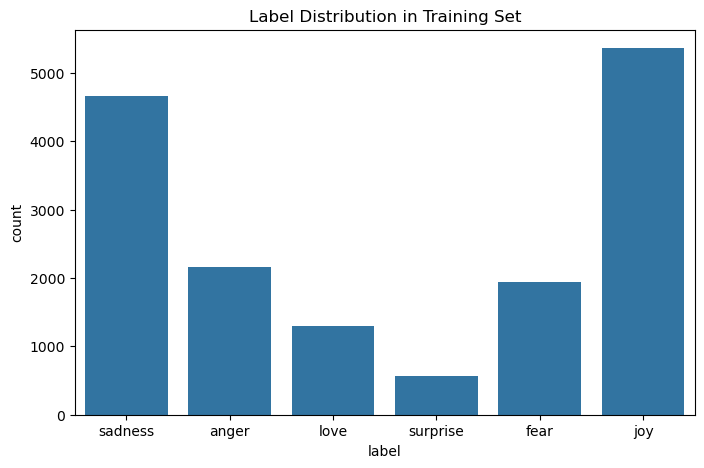

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['label'])
plt.title("Label Distribution in Training Set")
plt.show()


In [19]:
# Parameters
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_df['text'].values)

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df['text'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

X_val = tokenizer.texts_to_sequences(val_df['text'].values)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

X_test = tokenizer.texts_to_sequences(test_df['text'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Preparing labels
y_train = pd.get_dummies(train_df['label']).values
y_val = pd.get_dummies(val_df['label']).values
y_test = pd.get_dummies(test_df['label']).values

print(f"Training shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Testing shape: {X_test.shape}")


Training shape: (16000, 100)
Validation shape: (2000, 100)
Testing shape: (2000, 100)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))  # 6 classes for emotion classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,006 (7.94 MB)

 Trainable params: 2,081,006 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
BATCH_SIZE = 32
EPOCHS = 5

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.3946 - loss: 1.5087 - val_accuracy: 0.7810 - val_loss: 0.6711
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.8556 - loss: 0.4519 - val_accuracy: 0.9140 - val_loss: 0.2587
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.9444 - loss: 0.1564 - val_accuracy: 0.9190 - val_loss: 0.2208
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.9654 - loss: 0.1015 - val_accuracy: 0.9270 - val_loss: 0.2030
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.9739 - loss: 0.0723 - val_accuracy: 0.9265 - val_loss: 0.2195


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9166 - loss: 0.2132
Test Accuracy: 0.9175
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
              precision    recall  f1-score   support

     sadness       0.93      0.89      0.91       275
         joy       0.90      0.90      0.90       224
        love       0.91      0.96      0.94       695
       anger       0.86      0.78      0.82       159
        fear       0.96      0.94      0.95       581
    surprise       0.71      0.79      0.75        66

    accuracy                           0.92      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



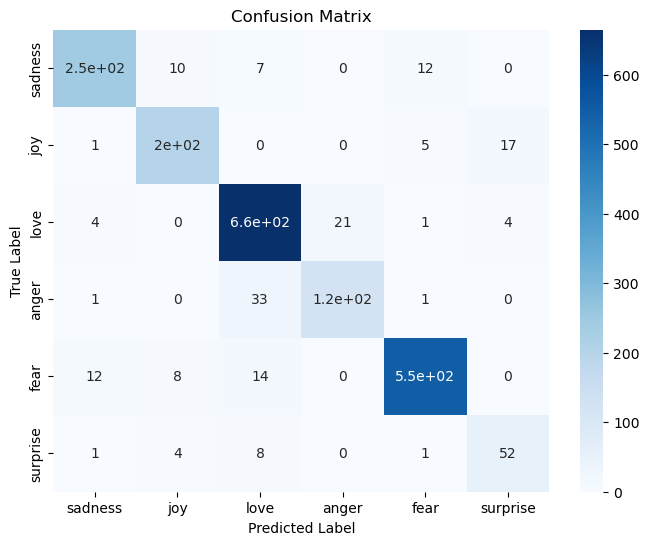

In [29]:
# Evaluate the model on the test set
score, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=list(label_mapping.values())))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


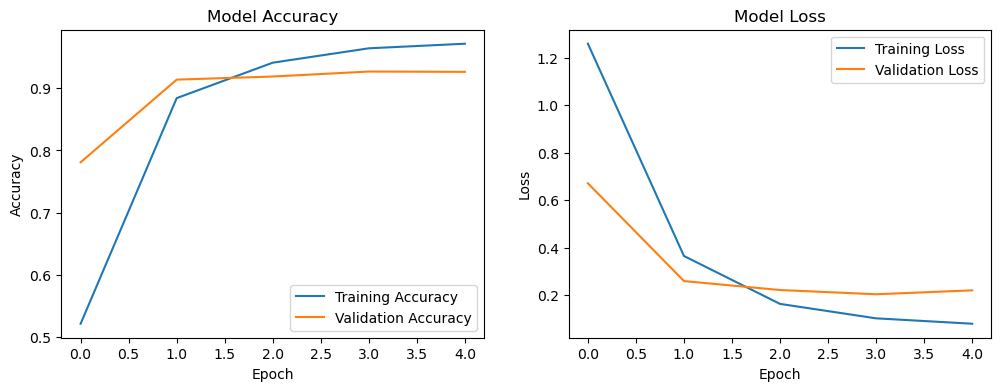

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
